In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2(a). [5 points] Load the data and plot it.

## 2(a) - 1: Load the data into a dataframe

In [17]:
with open('data/2/hw1x.dat', 'r') as f1:
    # next(f) # skip first row
    df = pd.DataFrame(l.rstrip().split() for l in f1)
    df.rename(columns={0: 'x'}, inplace=True)

with open('data/2/hw1y.dat', 'r') as f2:
    # next(f) # skip first row
    dfy = pd.DataFrame(l.rstrip().split() for l in f2)
    dfy.rename(columns={0: 'y'}, inplace=True)

In [18]:
df['y'] = dfy['y']
# df.drop(df.tail(1).index,inplace=True)
df.dropna(inplace=True)
df=df.astype(float)
df

,x,y
0,0.01,3.557667
1,0.02,4.873885
2,0.03,0.801153
3,0.04,3.942173
4,0.05,3.418765
5,0.06,1.812312
6,0.07,2.706408
7,0.08,3.502625
8,0.09,6.758397
9,0.10,5.969437


## 2(a) - 2: Plot the data based on the dataframe columns

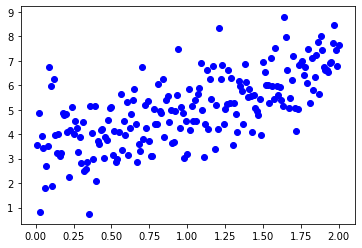

In [19]:
plt.figure()
plt.scatter(x=df['x'], y=df['y'], color='b')

plt.show()

# 2(b) [5 points] Add a column vector of 1s to the inputs, write a function implementing the closed form linear regression formula discussed in class to obtain the weight vector $\theta$. Plot both the linear regression line and the data on the same graph.

## 2(b) - 2: Load the labels and add a column of 1s to the inputs

In [11]:
x = np.array(df['x'])
y = np.array(df['y'])
x = np.c_[x, np.ones(len(df))]
print(x)
print(y)

[[0.01 1.  ]
 [0.02 1.  ]
 [0.03 1.  ]
 [0.04 1.  ]
 [0.05 1.  ]
 [0.06 1.  ]
 [0.07 1.  ]
 [0.08 1.  ]
 [0.09 1.  ]
 [0.1  1.  ]
 [0.11 1.  ]
 [0.12 1.  ]
 [0.13 1.  ]
 [0.14 1.  ]
 [0.15 1.  ]
 [0.16 1.  ]
 [0.17 1.  ]
 [0.18 1.  ]
 [0.19 1.  ]
 [0.2  1.  ]
 [0.21 1.  ]
 [0.22 1.  ]
 [0.23 1.  ]
 [0.24 1.  ]
 [0.25 1.  ]
 [0.26 1.  ]
 [0.27 1.  ]
 [0.28 1.  ]
 [0.29 1.  ]
 [0.3  1.  ]
 [0.31 1.  ]
 [0.32 1.  ]
 [0.33 1.  ]
 [0.34 1.  ]
 [0.35 1.  ]
 [0.36 1.  ]
 [0.37 1.  ]
 [0.38 1.  ]
 [0.39 1.  ]
 [0.4  1.  ]
 [0.41 1.  ]
 [0.42 1.  ]
 [0.43 1.  ]
 [0.44 1.  ]
 [0.45 1.  ]
 [0.46 1.  ]
 [0.47 1.  ]
 [0.48 1.  ]
 [0.49 1.  ]
 [0.5  1.  ]
 [0.51 1.  ]
 [0.52 1.  ]
 [0.53 1.  ]
 [0.54 1.  ]
 [0.55 1.  ]
 [0.56 1.  ]
 [0.57 1.  ]
 [0.58 1.  ]
 [0.59 1.  ]
 [0.6  1.  ]
 [0.61 1.  ]
 [0.62 1.  ]
 [0.63 1.  ]
 [0.64 1.  ]
 [0.65 1.  ]
 [0.66 1.  ]
 [0.67 1.  ]
 [0.68 1.  ]
 [0.69 1.  ]
 [0.7  1.  ]
 [0.71 1.  ]
 [0.72 1.  ]
 [0.73 1.  ]
 [0.74 1.  ]
 [0.75 1.  ]
 [0.76 1.  ]
 [0.77 1.  ]

## 2(b) - 3: Compute matrix A and vector b

In [13]:
a = (1/len(df)) * np.transpose(x).dot(x)
b = (1/len(df)) * np.transpose(x).dot(y)
print(a)
print(b)

[[1.34335 1.005  ]
 [1.005   1.     ]]
[5.65422023 5.03520194]


## 2(b) - 4: Compute weight

In [14]:
weight = np.dot(np.linalg.inv(a), b)
print(weight)

[1.78157138 3.2447227 ]


## 2(b) - 5: Compute prediction

In [15]:
prediction = x.dot(weight)
print(prediction)

[3.26253842 3.28035413 3.29816985 3.31598556 3.33380127 3.35161699
 3.3694327  3.38724841 3.40506413 3.42287984 3.44069556 3.45851127
 3.47632698 3.4941427  3.51195841 3.52977412 3.54758984 3.56540555
 3.58322127 3.60103698 3.61885269 3.63666841 3.65448412 3.67229984
 3.69011555 3.70793126 3.72574698 3.74356269 3.7613784  3.77919412
 3.79700983 3.81482555 3.83264126 3.85045697 3.86827269 3.8860884
 3.90390411 3.92171983 3.93953554 3.95735126 3.97516697 3.99298268
 4.0107984  4.02861411 4.04642983 4.06424554 4.08206125 4.09987697
 4.11769268 4.13550839 4.15332411 4.17113982 4.18895554 4.20677125
 4.22458696 4.24240268 4.26021839 4.2780341  4.29584982 4.31366553
 4.33148125 4.34929696 4.36711267 4.38492839 4.4027441  4.42055981
 4.43837553 4.45619124 4.47400696 4.49182267 4.50963838 4.5274541
 4.54526981 4.56308553 4.58090124 4.59871695 4.61653267 4.63434838
 4.65216409 4.66997981 4.68779552 4.70561124 4.72342695 4.74124266
 4.75905838 4.77687409 4.7946898  4.81250552 4.83032123 4.848136

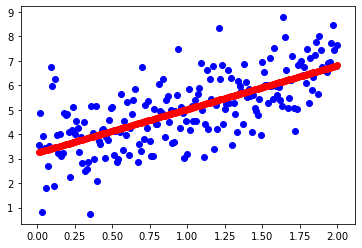

In [16]:
df['predict'] = prediction
plt.figure()
plt.scatter(x=df['x'], y=df['y'], color='b')
plt.scatter(x=df['x'], y=df['predict'], color='r')

plt.show()

# 2(c) [5 points] Write a function that will evaluate the training error in terms of empirical risk of the resulting fit in 2(b) and report the error.

# 2(d) [10 points] Write a function to calculate the weight vector $\theta$ using gradient descent. Consider learning rate $\eta$ = 0.01 and number of iterations as 100. Report $\theta$ for minimum empirical risk from all the iterations.

# 2(e) [10 points] Write a function to calculate the weight vector $\theta$ using stochastic gradient descent. Consider learning rate $\eta$ = 0.01 and number of iterations as 50. Report $\theta$ for minimum empirical risk from all the iterations

# 2(f) [10 points] Write a function called PolyRegress(x,y,d) which adds the features x<sup>2</sup>, x <sup>3</sup>, ... x <sup>d</sup> to the inputs and performs polynomial regression using closed form solution.

# 2(g) [5 points] Use your function to get a quadratic fit of the data. Plot the data and the fit. Report the training error. Is this a better fit? Repeat the same for 3rd order fit to 9th order fit. After which order fit does the error get worse?